This is the second assignement 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

Reading the data

In [8]:
mydata=pd.read_csv(r"C:\Users\tusha\OneDrive\Documents\python cab\data.txt", header = 0, sep = ',')
print ((mydata))

       mod0   vgsr
0     36.65  15080
1     37.29  18221
2     33.75   3129
3     32.66   4486
4     33.37   4564
...     ...    ...
4059  34.09   4843
4060  37.62  23832
4061  36.06  11410
4062  35.96   9105
4063  34.96   7952

[4064 rows x 2 columns]


In [9]:
mydata.columns=mydata.columns=['mod0','vgsr']

In [11]:
arr = mydata.to_numpy()

In [12]:
arr

array([[   36.65, 15080.  ],
       [   37.29, 18221.  ],
       [   33.75,  3129.  ],
       ...,
       [   36.06, 11410.  ],
       [   35.96,  9105.  ],
       [   34.96,  7952.  ]])

Finding the value of distance using the given formula

In [14]:
aa=10**(((arr[:,0])/5)-5)

In [89]:
aa

array([213.79620895, 287.0780582 ,  56.23413252, ..., 162.92960326,
       155.59656316,  98.1747943 ])

Preliminary Data Visualization

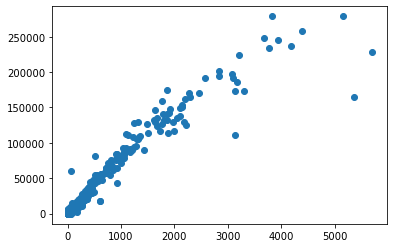

In [16]:
plt.scatter(aa,arr[:,1])

In [4]:
!pip install scipy

In [5]:
import scipy

In [6]:
from scipy.optimize import curve_fit as cf

In [17]:
def lin_func(x,m,c):
    return m*x + c

In [19]:
p_opt, p_cov = cf(lin_func,aa,arr[:,1])

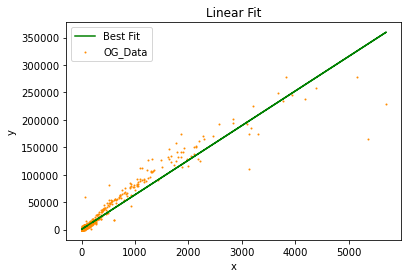

In [22]:
plt.plot(aa,lin_func(aa,*p_opt),label='Best Fit',color='g')
# * before a separable object unpacks it. So you don't need to write lin_func(xdata,p_opt[0],p_opt[1]). The *
# does it for you.
plt.scatter(aa,arr[:,1],label='OG_Data',s=1,color='darkorange')
# Yes, you can have scatter plot and a normal plot in one
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit')
plt.legend()

In [23]:
p_opt

array([ 62.98363409, 712.12417277])

In [24]:
p_cov

array([[ 6.86741954e-02, -6.36578291e+00],
       [-6.36578291e+00,  7.99837289e+03]])

In [25]:
m_opt, c_opt=p_opt

In [26]:
x_model = np.linspace(min(aa), max(aa), 100)

In [29]:
y_model = lin_func(x_model, m_opt, c_opt)

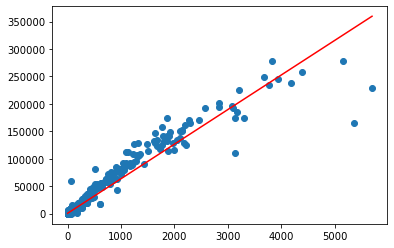

In [30]:
plt.scatter(aa,arr[:,1])
plt.plot(x_model,y_model, color='r')
plt.show()

In [35]:
sv=np.sqrt(np.diag(p_cov))
sv

array([ 0.26205762, 89.43362282])

Removing Outliers (OPTIONAL)

In [36]:
import statistics

In [39]:
avd = statistics.mean(aa)
avd

92.69543626899338

In [45]:
sv[0]*3

0.7861728552210756

In [46]:
low=avd-3*sv[0]
low

91.9092634137723

In [47]:
hig=avd+3*sv[0]
hig

93.48160912421446

In [52]:
x_stuff=aa

In [53]:
y_stuff=arr[:,1]

In [54]:
x_data = x_stuff[(x_stuff>low) & (x_stuff<hig)]
y_data = y_stuff[(x_stuff>low) & (x_stuff<hig)]

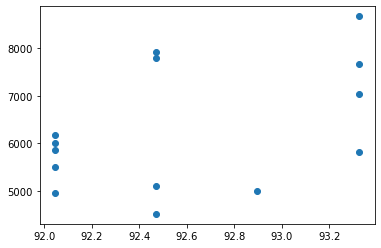

In [55]:
plt.scatter(x_data, y_data)
plt.show()

In [57]:
popt, pcov = cf(lin_func, x_data, y_data)

In [58]:
popt

array([  1087.63782696, -94419.75293782])

In [60]:
M_opt,C_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 1000)
y_model = lin_func(x_model,M_opt,C_opt)

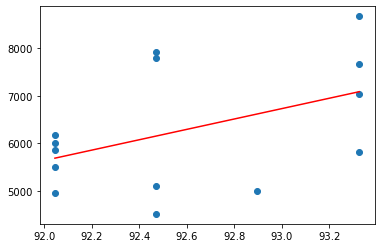

In [61]:
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, color='r')
plt.show()


In [62]:
popt

array([  1087.63782696, -94419.75293782])

In [63]:
np.sqrt(np.diag(pcov))

array([  619.23289883, 57337.55792585])

In [66]:
dl=abs(x_stuff*m_opt -y_stuff+c_opt)

In [67]:
avdl = statistics.mean(dl)
avdl

1496.575097448585

In [68]:
dl

array([ 902.21363255,  572.3435463 , 1124.9541988 , ...,  435.97731257,
       1407.16117277, 1056.4705059 ])

In [70]:
remove=avdl*0.5

In [71]:
l=avdl*0.5

In [72]:
h=avdl*1.5

In [73]:
x_d = x_stuff[(x_stuff>l) & (x_stuff<h)]
y_d = y_stuff[(x_stuff>l) & (x_stuff<h)]

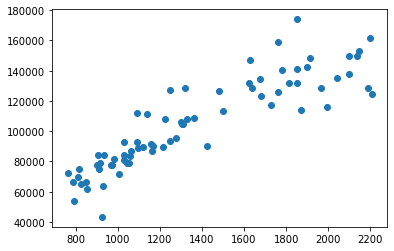

In [74]:
plt.scatter(x_d, y_d)
plt.show()

In [75]:
Popt, Pcov = cf(lin_func, x_d, y_d)

In [76]:
Popt

array([   60.22235233, 22844.30016538])

In [78]:
MM_opt,CC_opt = Popt
x_mo = np.linspace(min(x_d), max(x_d), 1000)
y_mo = lin_func(x_mo,MM_opt,CC_opt)

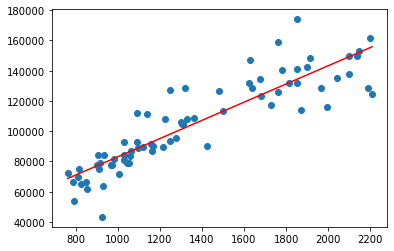

In [80]:
plt.scatter(x_d, y_d)
plt.plot(x_mo, y_mo, color='r')
plt.show()

In [81]:
Popt

array([   60.22235233, 22844.30016538])

In [82]:
np.sqrt(np.diag(Pcov))

array([3.58241813e+00, 5.13985664e+03])

Conclusion

In [86]:
Hnod=MM_opt
Hnod

60.222352332178865

In [87]:
age=1/Hnod

In [91]:
print('Final answer',age)

Final answer 0.01660513017631936
